In [167]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib .pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report

In [168]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [169]:
diab = pd.read_csv('diabetes.csv');
# https://query.data.world/s/4hq7za66d5few6do5ysc7zky33ios7

In [170]:
diab.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
440,0,189,104,25,0,34.3,0.435,41,1
631,0,102,78,40,90,34.5,0.238,24,0
288,4,96,56,17,49,20.8,0.340,26,0
121,6,111,64,39,0,34.2,0.260,24,0
171,6,134,70,23,130,35.4,0.542,29,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

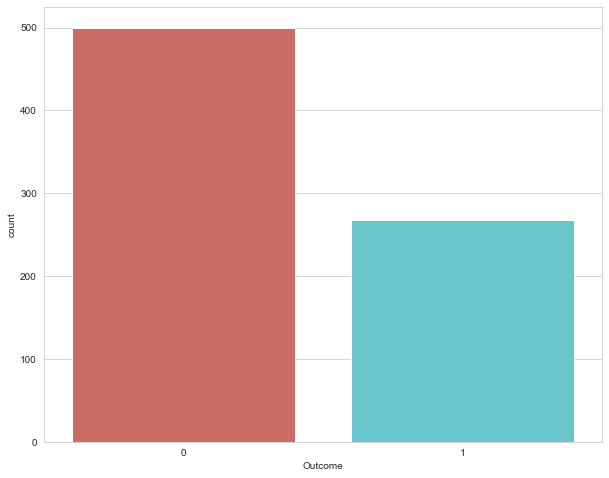

In [171]:
sb.countplot(x='Outcome', data=diab, palette='hls')

In [172]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [173]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [174]:
# diab_data = diab.drop(['Age'], 1)
# diab_data.head()

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

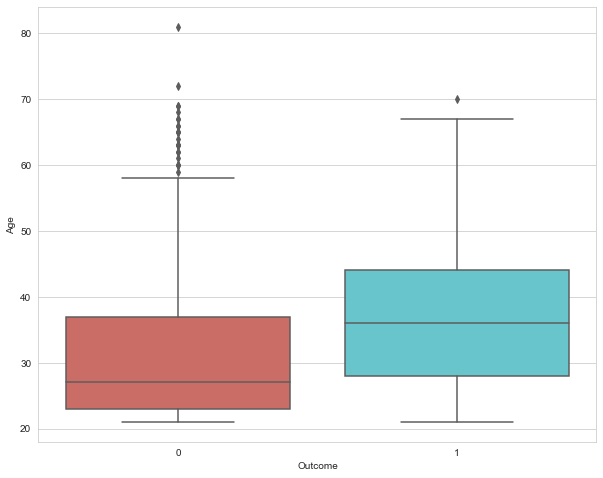

In [175]:
sb.boxplot(x='Outcome', y='Age', data=diab, palette='hls')

In [176]:
# def age_approx(cols):
#     Age = cols[0]
#     Outcome = cols[1]
    
#     if pd.isnull(Age):
#         if Pclass == 1:
#             return 37
#         elif Pclass == 2:
#             return 29
#         else:
#             return 24
#     else:
#         return Age

In [177]:
# titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
# titanic_data.isnull().sum()

In [178]:
# diab_data
# diab_data.dropna(inplace=True)
# diab_data.isnull().sum()

In [179]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [180]:
pregnant= pd.get_dummies(diab['Pregnancies'])
pregnant.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
len = diab.shape
row_len = len[0]
len

(768, 9)

In [182]:
for i in range(row_len):
    if pregnant.iloc[i,0] == 1:
        diab['Gone-through-Pregnancy'] = True
    else:
        diab['Gone-through-Pregnancy'] = False

In [ ]:
plp

In [183]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gone-through-Pregnancy
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,False
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,False
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False
766,1,126,60,0,0,30.1,0.349,47,1,False


<AxesSubplot:>

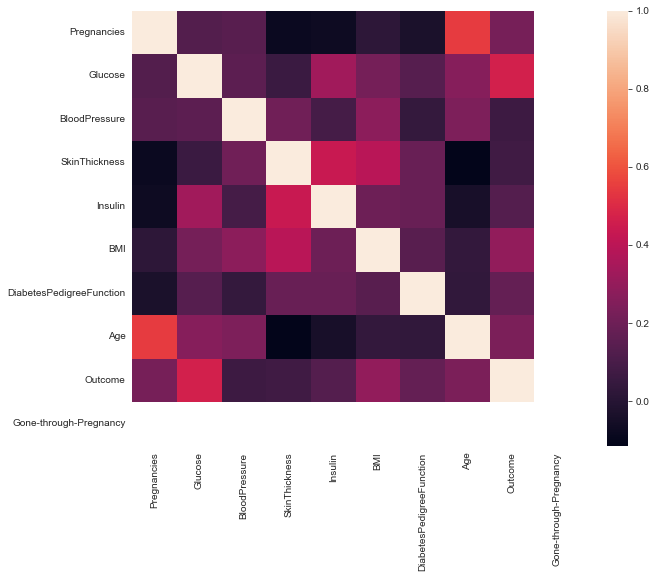

In [184]:
sb.heatmap(diab.corr())

In [185]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gone-through-Pregnancy    768 non-null    bool   
dtypes: bool(1), float64(2), int64(7)
memory usage: 54.9 KB


In [186]:
X = diab.iloc[:,:8].values
y = diab.iloc[:,8].values

In [187]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [188]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [189]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 15,random_state=6)

In [190]:
Logreg = LogisticRegression()
Logreg.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
y_pred = Logreg.predict(X_test)

In [192]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [193]:
df_pred

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [195]:
confusion_matrix

array([[11,  0],
       [ 1,  3]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

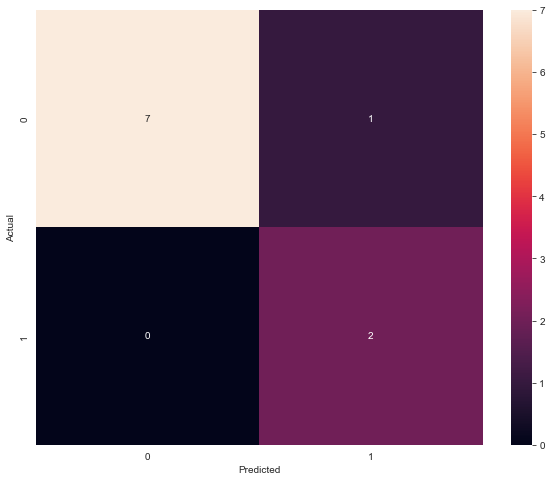

In [162]:
cnf_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(cnf_matrix, annot=True)